<a href="https://colab.research.google.com/github/mafiTec/Linear_Regression_Project-Seoul-Bike-dataset./blob/main/Seoul_Bike_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

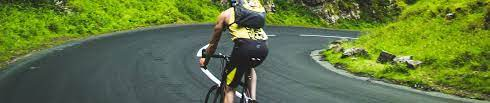

In [3]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Linear Regression model/bik.png')

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)  

Loding The dataset

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Linear Regression model/SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# statestical info
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [9]:
# additional info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [10]:
# unique value
df.apply(lambda x: len(x.unique()))

Date                         365
Rented Bike Count           2166
Hour                          24
Temperature(C)               546
Humidity(%)                   90
Wind speed (m/s)              65
Visibility (10m)            1789
Dew point temperature(C)     556
Solar Radiation (MJ/m2)      345
Rainfall(mm)                  61
Snowfall (cm)                 51
Seasons                        4
Holiday                        2
Functioning Day                2
dtype: int64

In [11]:
# check for null values
df.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [12]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date"]

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [13]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [14]:
df_catagoric_features = df.select_dtypes(include=object)
df_catagoric_features.columns

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [15]:
dummy_encoded_variables = pd.get_dummies(df_catagoric_features, drop_first=True)
df_numeric_features = df.select_dtypes(include=np.number)

In [16]:
df = pd.concat([df_numeric_features,dummy_encoded_variables], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,12,0,0,1,1,1


Explore the data analysis

[Text(0.5, 1.0, 'What are the factors that influence the number of bikes rented ')]

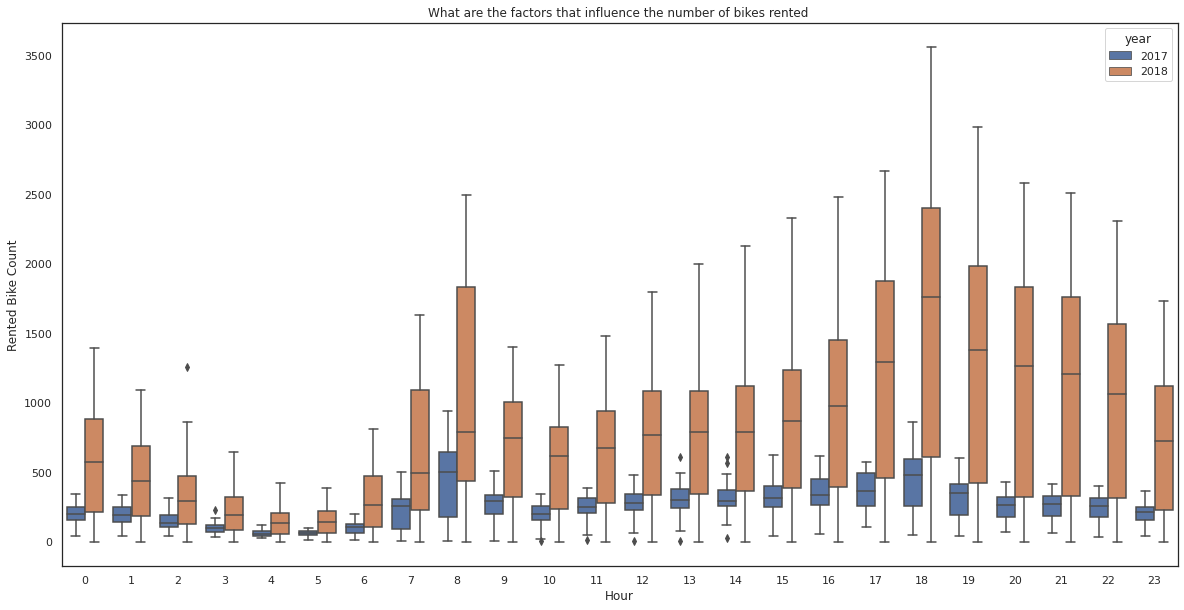

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=df, x='Hour', y='Rented Bike Count', hue='year', ax=ax)
ax.set(title='What are the factors that influence the number of bikes rented ')

Corelation Matrix

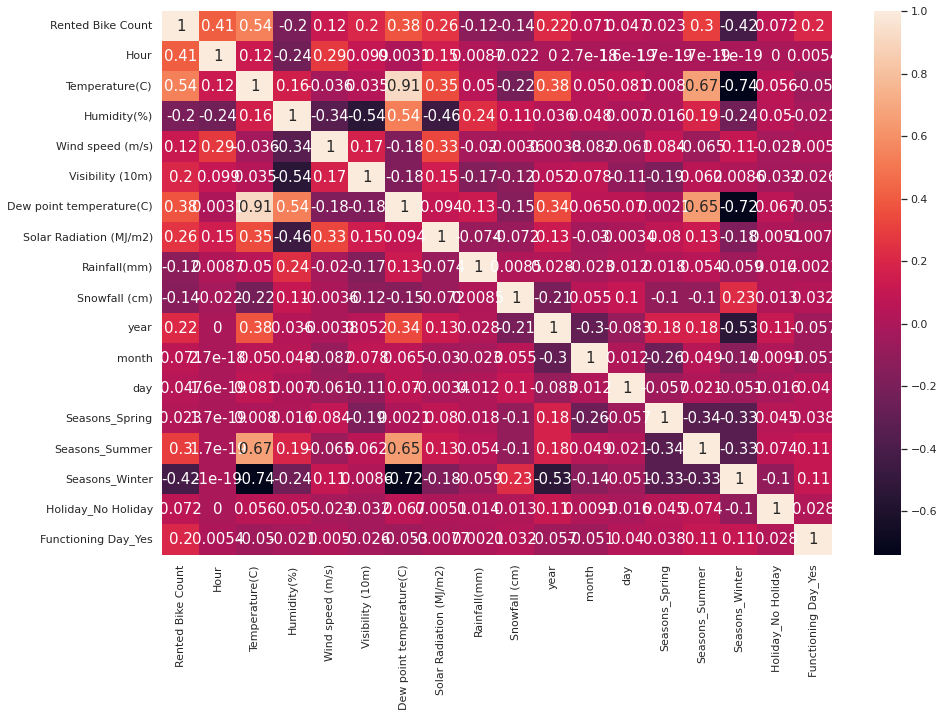

In [18]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, annot_kws={'size':15})

[Text(0.5, 1.0, 'Relation between humidity and bike rental')]

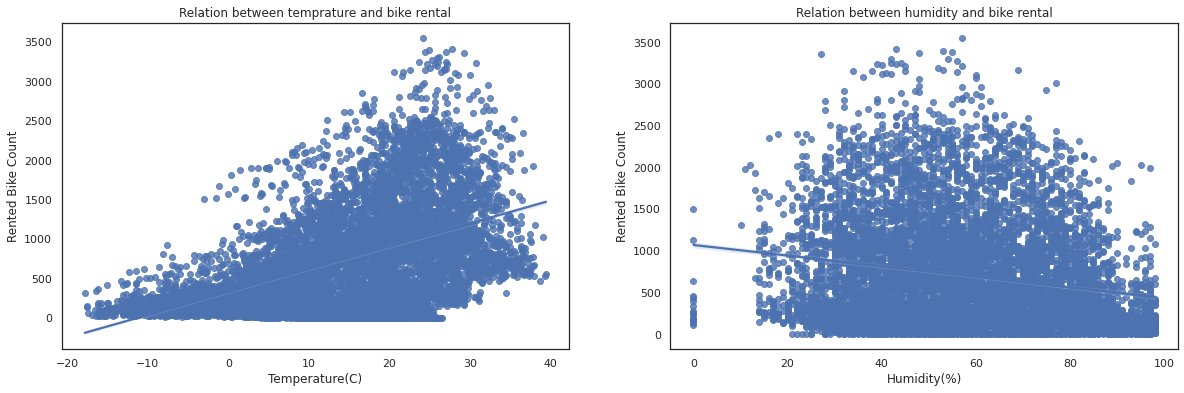

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['Temperature(C)'], y=df['Rented Bike Count'], ax=ax1)
ax1.set(title="Relation between temprature and bike rental")
sns.regplot(x=df['Humidity(%)'], y=df['Rented Bike Count'], ax=ax2)
ax2.set(title="Relation between humidity and bike rental")

[Text(0.5, 1.0, 'theortical quantiles')]

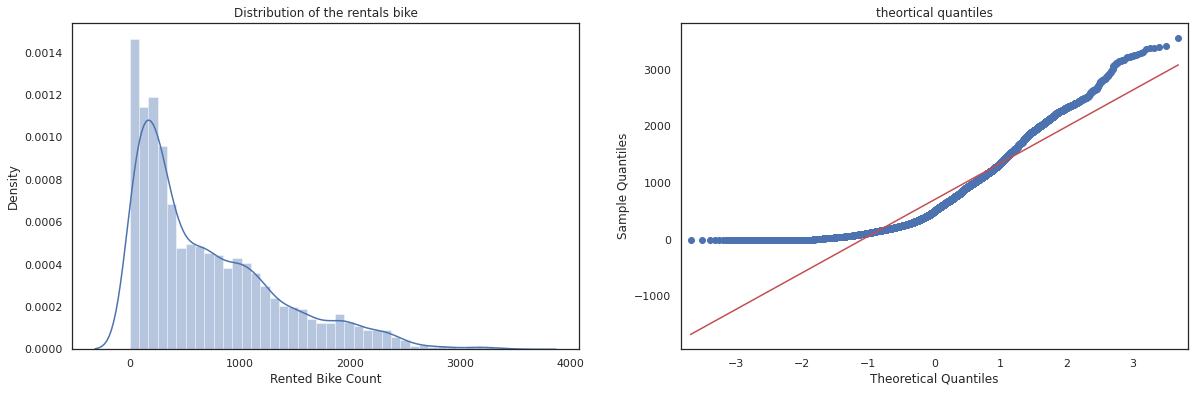

In [20]:
from statsmodels.graphics.gofplots import  qqplot
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['Rented Bike Count'], ax=ax1)
ax1.set(title='Distribution of the rentals bike')
qqplot(df['Rented Bike Count'], ax=ax2, line='s')
ax2.set(title='theortical quantiles')

[Text(0.5, 1.0, 'theortical quantiles')]

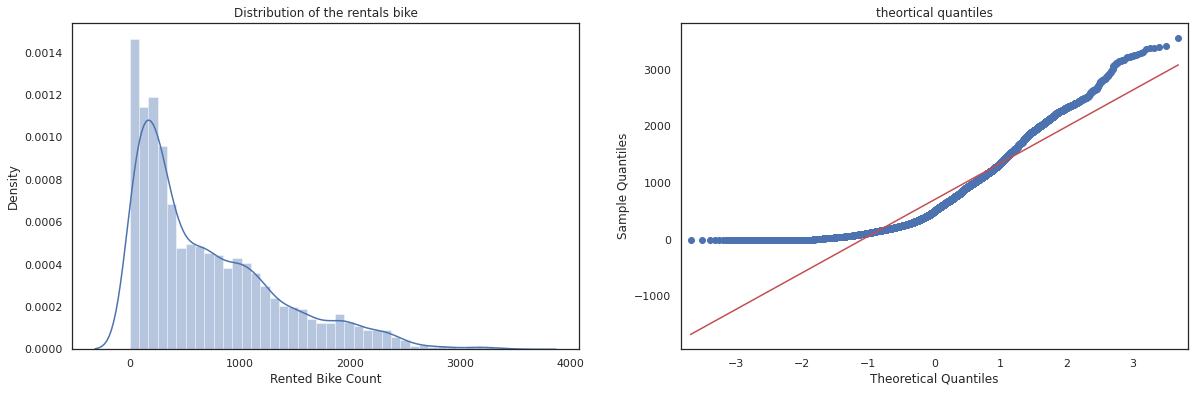

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.distplot(df['Rented Bike Count'], ax=ax1)
ax1.set(title='Distribution of the rentals bike')
qqplot(df['Rented Bike Count'], ax=ax2, line='s')
ax2.set(title='theortical quantiles')


Iput Split

In [22]:
target_corr = abs(corr['Rented Bike Count'])
positive_corr_target = target_corr[target_corr> (0.2)]
positive_corr_target

Rented Bike Count           1.000000
Hour                        0.410257
Temperature(C)              0.538558
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
year                        0.215162
Seasons_Summer              0.296549
Seasons_Winter              0.424925
Functioning Day_Yes         0.203943
Name: Rented Bike Count, dtype: float64

In [23]:
df.shape

(8760, 18)

In [24]:
X = df.drop(['Rented Bike Count'],axis=1).values   
y = df['Rented Bike Count'].values

In [49]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.2, random_state=42)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_y = train['Rented Bike Count'] # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_y = val['Rented Bike Count']

In [52]:
print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (7008, 17)
Dimension of train_y dataframe: (7008,)
Dimension of val_x dataframe: (1752, 17)
Dimension of val_y dataframe: (1752,)


In [53]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred = ln_reg.predict(val_x)
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))
print('Accuracy:',ln_reg.score(val_x,val_y))

Mean Square Error of linear regression: 193899.22357896305
R_Squared Score of linear regression: 0.17367347845868597
Accuracy: 0.5346190460151219


Ridge(L2) Regression

In [55]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 2.81687406e+01,  1.75902848e+01, -1.04616900e+01,  1.90712977e+01,
        7.27758899e-03,  9.77579542e+00, -7.91917957e+01, -6.10749544e+01,
        2.74881003e+01, -9.41628252e+01,  4.23310250e-01, -1.39520251e+00,
       -1.46535865e+02, -1.65666700e+02, -3.99228222e+02,  1.31813474e+02,
        9.47565734e+02])

In [57]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5346720027956942
number of feature used: 17


Lasso(L1) Regression

In [58]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 2.83192128e+01,  1.79248057e+01, -1.01740017e+01,  1.59068811e+01,
        1.12990886e-02,  9.41887741e+00, -7.53315395e+01, -6.02338390e+01,
        2.23484074e+01, -5.13110870e+01,  2.81481833e+00, -1.04549874e+00,
       -1.16034002e+02, -1.41969444e+02, -3.52126522e+02,  1.08483742e+02,
        9.07316044e+02])

In [60]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5348368473641052
number of feature used: 17
